# Medida de la retardancia

**Autor:** Jesús del Hoyo.

**Fecha:** 02/03/2022.

El objetivo de este archivo es estudiar la edida de la retardancia de una lámina retardadora (omo una lámina de cuarto de onda).

In [2]:
%load_ext autoreload
%autoreload 2

In [11]:
from py_pol.jones_matrix import Jones_matrix, Jones_vector, np, degrees
from slm_alignment_errors import *

import matplotlib.pyplot as plt

## Método 1: Ajuste de curva de intensidad

Aquí vamos a medir la potencia que atraviesa un sistema formado por un polarizador, la lámina retardadora (giratoria) y un segundo polarizador a 90º del primero. El caso ideal sigue la siguiente curva:

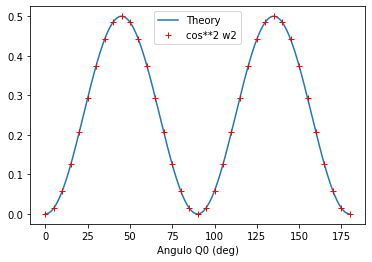

In [14]:
# Angulos pol paralelos, landa cuartos fija de retardancia variable
angulos = np.linspace(0*degrees, 180*degrees, 361)
S = Jones_vector().linear_light()
Q0 = Jones_matrix().quarter_waveplate(azimuth=angulos)
P1 = Jones_matrix().diattenuator_perfect(azimuth=90*degrees)    
Sfin = P1 * Q0 * S
I = Sfin.parameters.intensity()
plt.plot(angulos/degrees, I)
plt.ylabel=("I")
plt.xlabel("Angulo Q0 (deg)")

angulos_fit = np.linspace(0*degrees, 180*degrees, 37)
y = cos2_2([0, 0.5, 45*degrees], angulos_fit)
plt.plot(angulos_fit/degrees, y, 'r+')
plt.legend(("Theory", "cos**2 w2"))

Como se puede ver, se ajusta a un coseno cuadrado de doble frecuencia:  $I = I_0 + I_{amp}*\cos^2(2*(\theta-\theta_0))$.

Vamos a ver los efectos de cada una de las variables que pueden cambiar en este método.

### A) Variación del ángulo de origen de la lámina

En primer lugar, voy a variar el ángulo de origen de la lámina retardadora entre 0º y 50º.

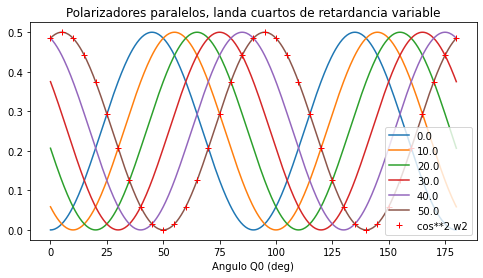

In [24]:
angulos = np.linspace(0*degrees, 180*degrees, 361)
S = Jones_vector().linear_light()
P1 = Jones_matrix().diattenuator_perfect(azimuth=90*degrees)    

plt.figure(figsize=(8,4))
angulos0 = np.linspace(0, 50, 6)
for a0 in angulos0:
    Q0 = Jones_matrix().retarder_linear(azimuth=angulos-a0*degrees, R=90*degrees)  
    Sfin = P1 * Q0 * S
    I = Sfin.parameters.intensity()
    plt.plot(angulos/degrees, I)
plt.ylabel=("I")
plt.xlabel("Angulo Q0 (deg)")
plt.title("Polarizadores paralelos, landa cuartos de retardancia variable")


angulos_fit = np.linspace(0*degrees, 180*degrees, 37)
y = cos2_2([0, 0.5, 45*degrees + 50*degrees], angulos_fit)
plt.plot(angulos_fit/degrees, y, 'r+')
plt.legend((*angulos0, "cos**2 w2"))

La gráfica se desplaza.

### B) Variación de la retardancia

Ahora voy a variar la retardancia de la lámina retardadora entre 80º y 100º.

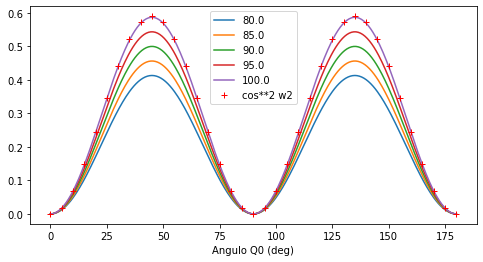

In [30]:
angulos = np.linspace(0*degrees, 180*degrees, 361)
S = Jones_vector().linear_light()
P1 = Jones_matrix().diattenuator_perfect(azimuth=90*degrees)    

plt.figure(figsize=(8,4))
angulos0 = np.linspace(80, 100, 5)
for a0 in angulos0:
    Q0 = Jones_matrix().retarder_linear(azimuth=angulos, R=a0*degrees)  
    Sfin = P1 * Q0 * S
    I = Sfin.parameters.intensity()
    plt.plot(angulos/degrees, I)
plt.ylabel=("I")
plt.xlabel("Angulo Q0 (deg)")

angulos_fit = np.linspace(0*degrees, 180*degrees, 37)
y = cos2_2([0, 0.5 + 0.09, 45*degrees], angulos_fit)
plt.plot(angulos_fit/degrees, y, 'r+')
plt.legend((*angulos0, "cos**2 w2"))

La altura cambia

### C) Variación de la transmisión máxima del polarizador

Ahora voy a cambiar la transmisión máxima del polarizador entre 0.9 y 1 (transmisión máxima de campo eléctrico, no de intensidad).

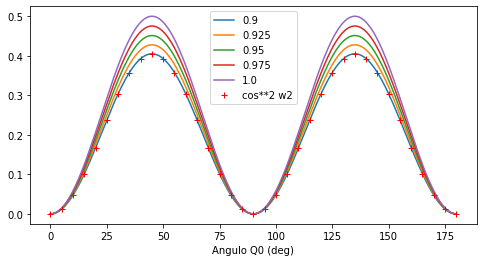

In [39]:
angulos = np.linspace(0*degrees, 180*degrees, 361)
S = Jones_vector().linear_light()
Q0 = Jones_matrix().retarder_linear(azimuth=angulos, R=90*degrees)  

plt.figure(figsize=(8,4))
param = np.linspace(0.9, 1, 5)
for aux in param:
    P1 = Jones_matrix().diattenuator_linear(azimuth=90*degrees, p1=aux, p2=0)
    Sfin = P1 * Q0 * S
    I = Sfin.parameters.intensity()
    plt.plot(angulos/degrees, I)
plt.ylabel=("I")
plt.xlabel("Angulo Q0 (deg)")

angulos_fit = np.linspace(0*degrees, 180*degrees, 37)
y = cos2_2([0, 0.5 - 0.095, 45*degrees], angulos_fit)
plt.plot(angulos_fit/degrees, y, 'r+')
plt.legend((*param, "cos**2 w2"))

La altura de la curva baja.

### D) Cambio en el angulo entre polarizadores

Ahora voy a variar el ángulo entre polarizadores entre 80º y 100º.

0.015076844804644279 0.49999999999844585 49.999999999999886


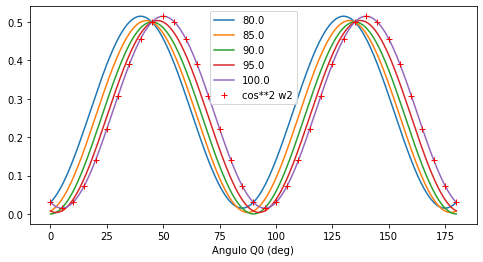

In [42]:
angulos = np.linspace(0*degrees, 180*degrees, 361)
S = Jones_vector().linear_light()
Q0 = Jones_matrix().retarder_linear(azimuth=angulos, R=90*degrees)  

plt.figure(figsize=(8,4))
param = np.linspace(80, 100, 5)
for aux in param:
    P1 = Jones_matrix().diattenuator_perfect(azimuth=aux*degrees)
    Sfin = P1 * Q0 * S
    I = Sfin.parameters.intensity()
    plt.plot(angulos/degrees, I)
plt.ylabel=("I")
plt.xlabel("Angulo Q0 (deg)")

result = least_squares(x0=[0, 0.5, 45*degrees], fun=error_cos2_2, bounds=((0, 0, 0), (0.1, 0.6, 180*degrees)), args=(angulos, I))
print(result.x[0], result.x[1], result.x[2]/degrees)
angulos_fit = np.linspace(0*degrees, 180*degrees, 37)
y = cos2_2(result.x, angulos_fit)
plt.plot(angulos_fit/degrees, y, 'r+')
plt.legend((*param, "cos**2 w2"))

Afecta únicamente al valor mínimo de la intensidad.

### E) Cambio en la extinción del polarizador

Por último voy a cambiar el valor de transmisión de extinción del polarizador entre 0 y 0.1 (transmisión en campo eléctrico, no en intensidad).

0.03999999999175634 0.4800000000109934 44.999999999999986


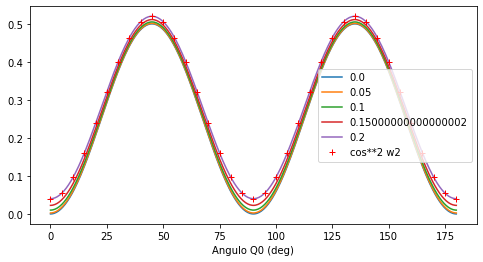

In [45]:
angulos = np.linspace(0*degrees, 180*degrees, 361)
S = Jones_vector().linear_light()
Q0 = Jones_matrix().retarder_linear(azimuth=angulos, R=90*degrees)  

plt.figure(figsize=(8,4))
param = np.linspace(0, 0.2, 5)
for aux in param:
    P1 = Jones_matrix().diattenuator_linear(azimuth=90*degrees, p1=1, p2=aux)
    Sfin = P1 * Q0 * S
    I = Sfin.parameters.intensity()
    plt.plot(angulos/degrees, I)
plt.ylabel=("I")
plt.xlabel("Angulo Q0 (deg)")

result = least_squares(x0=[0, 0.5, 45*degrees], fun=error_cos2_2, bounds=((0, 0, 0), (0.1, 0.6, 180*degrees)), args=(angulos, I))
print(result.x[0], result.x[1], result.x[2]/degrees)
angulos_fit = np.linspace(0*degrees, 180*degrees, 37)
y = cos2_2(result.x, angulos_fit)
plt.plot(angulos_fit/degrees, y, 'r+')
plt.legend((*param, "cos**2 w2"))

Este valor afecta tanto al valor mínimo como a la amplitud de la curva de intensidad.

### F) Elipticidad del estado inicial

El estado inicial puede ser ligeramente eliptico. Voy a variar esta elipticidad inicial entre 0 y 5º.

0.007596122757472364 0.4924038774975384 45.00000000008299


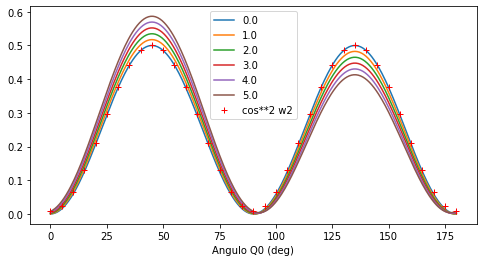

In [46]:
angulos = np.linspace(0*degrees, 180*degrees, 361)
Q0 = Jones_matrix().retarder_linear(azimuth=angulos, R=90*degrees)  
P1 = Jones_matrix().diattenuator_linear(azimuth=90*degrees, p1=1, p2=0)

plt.figure(figsize=(8,4))
param = np.linspace(0, 5, 6)
for aux in param:
    S = Jones_vector().general_azimuth_ellipticity(azimuth=0, ellipticity=aux*degrees)
    Sfin = P1 * Q0 * S
    I = Sfin.parameters.intensity()
    plt.plot(angulos/degrees, I)
plt.ylabel=("I")
plt.xlabel("Angulo Q0 (deg)")

result = least_squares(x0=[0, 0.5, 45*degrees], fun=error_cos2_2, bounds=((0, 0, 0), (0.1, 0.6, 180*degrees)), args=(angulos, I))
print(result.x[0], result.x[1], result.x[2]/degrees)
angulos_fit = np.linspace(0*degrees, 180*degrees, 37)
y = cos2_2(result.x, angulos_fit)
plt.plot(angulos_fit/degrees, y, 'r+')
plt.legend((*param, "cos**2 w2"))

En este caso lo que ocurre es que cada uno de los dos picos tiene una diferente altura. Puesto que el ajuste evita este efecto, este error es inapreciable en los experimentos.

### Conclusión

Vamos a recapitular lo que he encontrado:

1. Todas las curvas son del tipo $I = I_0 + I_{amp}*\cos^2(2*(\theta-\theta_0))$ salo si el estado inicial es elíptico. Esta funcion tiene 3 parámetros.
1. Estos tres parámetros son función de las siguientes variables:
    1. $I_0$ es función del ángulo entre polarizadores y de su coeficiente de extinción.
    1. $I_{amp}$ es función de la retardancia y de los coeficiente de transmisión máxima y extinción del polarizador.
    1. $\theta_0$ es función del ángulo de origen de la lámina retardadora y del ángulo entre polarizadores.
    
Por lo tanto, se puede calibrar la lámina retardadora si se conocen los coeficientes de tranmisión máxima y mínima de los polarizadores.